<a href="https://colab.research.google.com/github/Aqeedathussain/A-C-currency-breakdown-program-for-an-amount-like-1330./blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the survival of a person on Titanic Dataset

Importing dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=sns.load_dataset('titanic') # Importing dataset
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Changing the position of the alive column

In [ ]:
alive_col=df.pop('alive')
df.insert(14,'alive', alive_col) # Changing position of alive column from second last to last
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone,alive
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False,no
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False,yes
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True,yes
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False,yes
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,True,no
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,True,yes
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False,no
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,True,yes


Handeling the missing values

In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

Dropping the useless data columns

In [ ]:
# Drop the deck column as it has maximum NaN values
df.drop('deck', axis=1, inplace=True)

In [ ]:
# Drop the survived column as we have the alive column that we can use
df.drop('survived', axis=1, inplace=True)

In [ ]:
# Drop the alone column as we have the sibsp column
df.drop('alone', axis=1, inplace=True)


In [ ]:
# Drop the fare column as its information overlaps with the pclass column
df.drop('fare', axis=1, inplace=True)


In [ ]:
# Drop the embarked column as we have the column of embarked_town
df.drop('embarked', axis=1, inplace=True)

Making the copy of the data

In [ ]:
dfcopy=df.copy()
dfcopy

,pclass,sex,age,sibsp,parch,class,who,adult_male,embark_town,alive
0,3,male,22.000000,1,0,Third,man,True,Southampton,no
1,1,female,38.000000,1,0,First,woman,False,Cherbourg,yes
2,3,female,26.000000,0,0,Third,woman,False,Southampton,yes
3,1,female,35.000000,1,0,First,woman,False,Southampton,yes
4,3,male,35.000000,0,0,Third,man,True,Southampton,no
...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,Second,man,True,Southampton,no
887,1,female,19.000000,0,0,First,woman,False,Southampton,yes
888,3,female,29.699118,1,2,Third,woman,False,Southampton,no
889,1,male,26.000000,0,0,First,man,True,Cherbourg,yes


Normalizing the columns

In [ ]:
# One_Hot Encoding the columns
dfcopy=df.copy() # Re-initializing dfcopy to ensure original columns are present
dfcopy = pd.get_dummies(dfcopy, columns=['pclass', 'embark_town', 'class', 'who'])
dfcopy

,sex,age,sibsp,parch,adult_male,alive,pclass_1,pclass_2,pclass_3,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,class_First,class_Second,class_Third,who_child,who_man,who_woman
0,male,22.000000,1,0,True,no,False,False,True,False,False,True,False,False,True,False,True,False
1,female,38.000000,1,0,False,yes,True,False,False,True,False,False,True,False,False,False,False,True
2,female,26.000000,0,0,False,yes,False,False,True,False,False,True,False,False,True,False,False,True
3,female,35.000000,1,0,False,yes,True,False,False,False,False,True,True,False,False,False,False,True
4,male,35.000000,0,0,True,no,False,False,True,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.000000,0,0,True,no,False,True,False,False,False,True,False,True,False,False,True,False
887,female,19.000000,0,0,False,yes,True,False,False,False,False,True,True,False,False,False,False,True
888,female,29.699118,1,2,False,no,False,False,True,False,False,True,False,False,True,False,False,True
889,male,26.000000,0,0,True,yes,True,False,False,True,False,False,True,False,False,False,True,False


In [ ]:
# label Encoding the columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfcopy['sex']=le.fit_transform(dfcopy['sex'])
dfcopy['adult_male']=le.fit_transform(dfcopy['adult_male'].astype(int))
dfcopy['alive']=le.fit_transform(dfcopy['alive'])

dfcopy

,sex,age,sibsp,parch,adult_male,alive,pclass_1,pclass_2,pclass_3,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,class_First,class_Second,class_Third,who_child,who_man,who_woman
0,1,22.000000,1,0,1,0,False,False,True,False,False,True,False,False,True,False,True,False
1,0,38.000000,1,0,0,1,True,False,False,True,False,False,True,False,False,False,False,True
2,0,26.000000,0,0,0,1,False,False,True,False,False,True,False,False,True,False,False,True
3,0,35.000000,1,0,0,1,True,False,False,False,False,True,True,False,False,False,False,True
4,1,35.000000,0,0,1,0,False,False,True,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.000000,0,0,1,0,False,True,False,False,False,True,False,True,False,False,True,False
887,0,19.000000,0,0,0,1,True,False,False,False,False,True,True,False,False,False,False,True
888,0,29.699118,1,2,0,0,False,False,True,False,False,True,False,False,True,False,False,True
889,1,26.000000,0,0,1,1,True,False,False,True,False,False,True,False,False,False,True,False


Standard Scaling the other columns

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dfcopy['age']=sc.fit_transform(dfcopy[['age']])
dfcopy['parch']=sc.fit_transform(dfcopy[['parch']])
dfcopy['sibsp']=sc.fit_transform(dfcopy[['sibsp']])
dfcopy

,sex,age,sibsp,parch,adult_male,alive,pclass_1,pclass_2,pclass_3,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,class_First,class_Second,class_Third,who_child,who_man,who_woman
0,1,-0.592481,0.432793,-0.473674,1,0,False,False,True,False,False,True,False,False,True,False,True,False
1,0,0.638789,0.432793,-0.473674,0,1,True,False,False,True,False,False,True,False,False,False,False,True
2,0,-0.284663,-0.474545,-0.473674,0,1,False,False,True,False,False,True,False,False,True,False,False,True
3,0,0.407926,0.432793,-0.473674,0,1,True,False,False,False,False,True,True,False,False,False,False,True
4,1,0.407926,-0.474545,-0.473674,1,0,False,False,True,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,-0.207709,-0.474545,-0.473674,1,0,False,True,False,False,False,True,False,True,False,False,True,False
887,0,-0.823344,-0.474545,-0.473674,0,1,True,False,False,False,False,True,True,False,False,False,False,True
888,0,0.000000,0.432793,2.008933,0,0,False,False,True,False,False,True,False,False,True,False,False,True
889,1,-0.284663,-0.474545,-0.473674,1,1,True,False,False,True,False,False,True,False,False,False,True,False


Changing the datatype of some columns to integer

In [ ]:
dfcopy[['class_First', 'pclass_1', 'pclass_2', 'pclass_3', 'embark_town_Cherbourg', 'embark_town_Queenstown', 'embark_town_Southampton', 'class_Second', 'class_Third', 'who_child', 'who_man', 'who_woman']] = dfcopy[['class_First', 'pclass_1', 'pclass_2', 'pclass_3', 'embark_town_Cherbourg', 'embark_town_Queenstown', 'embark_town_Southampton', 'class_Second', 'class_Third', 'who_child', 'who_man', 'who_woman']].astype(int)
dfcopy

,sex,age,sibsp,parch,adult_male,alive,pclass_1,pclass_2,pclass_3,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,class_First,class_Second,class_Third,who_child,who_man,who_woman
0,1,-0.592481,0.432793,-0.473674,1,0,0,0,1,0,0,1,0,0,1,0,1,0
1,0,0.638789,0.432793,-0.473674,0,1,1,0,0,1,0,0,1,0,0,0,0,1
2,0,-0.284663,-0.474545,-0.473674,0,1,0,0,1,0,0,1,0,0,1,0,0,1
3,0,0.407926,0.432793,-0.473674,0,1,1,0,0,0,0,1,1,0,0,0,0,1
4,1,0.407926,-0.474545,-0.473674,1,0,0,0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,-0.207709,-0.474545,-0.473674,1,0,0,1,0,0,0,1,0,1,0,0,1,0
887,0,-0.823344,-0.474545,-0.473674,0,1,1,0,0,0,0,1,1,0,0,0,0,1
888,0,0.000000,0.432793,2.008933,0,0,0,0,1,0,0,1,0,0,1,0,0,1
889,1,-0.284663,-0.474545,-0.473674,1,1,1,0,0,1,0,0,1,0,0,0,1,0


Removing the p class column

In [ ]:
dfcopy.drop(['pclass_1', 'pclass_2', 'pclass_3'], axis=1, inplace=True)
dfcopy

,sex,age,sibsp,parch,adult_male,alive,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,class_First,class_Second,class_Third,who_child,who_man,who_woman
0,1,-0.592481,0.432793,-0.473674,1,0,0,0,1,0,0,1,0,1,0
1,0,0.638789,0.432793,-0.473674,0,1,1,0,0,1,0,0,0,0,1
2,0,-0.284663,-0.474545,-0.473674,0,1,0,0,1,0,0,1,0,0,1
3,0,0.407926,0.432793,-0.473674,0,1,0,0,1,1,0,0,0,0,1
4,1,0.407926,-0.474545,-0.473674,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,-0.207709,-0.474545,-0.473674,1,0,0,0,1,0,1,0,0,1,0
887,0,-0.823344,-0.474545,-0.473674,0,1,0,0,1,1,0,0,0,0,1
888,0,0.000000,0.432793,2.008933,0,0,0,0,1,0,0,1,0,0,1
889,1,-0.284663,-0.474545,-0.473674,1,1,1,0,0,1,0,0,0,1,0


Dropping useless data columns


In [ ]:
dfcopy.drop(['adult_male'], axis=1, inplace=True, errors='ignore')
dfcopy

,sex,age,sibsp,parch,alive,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,class_First,class_Second,class_Third,who_child,who_man,who_woman
0,1,-0.592481,0.432793,-0.473674,0,0,0,1,0,0,1,0,1,0
1,0,0.638789,0.432793,-0.473674,1,1,0,0,1,0,0,0,0,1
2,0,-0.284663,-0.474545,-0.473674,1,0,0,1,0,0,1,0,0,1
3,0,0.407926,0.432793,-0.473674,1,0,0,1,1,0,0,0,0,1
4,1,0.407926,-0.474545,-0.473674,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,-0.207709,-0.474545,-0.473674,0,0,0,1,0,1,0,0,1,0
887,0,-0.823344,-0.474545,-0.473674,1,0,0,1,1,0,0,0,0,1
888,0,0.000000,0.432793,2.008933,0,0,0,1,0,0,1,0,0,1
889,1,-0.284663,-0.474545,-0.473674,1,1,0,0,1,0,0,0,1,0


Changing the index of the alive column

In [ ]:
col_alive=dfcopy.pop('alive')
dfcopy.insert(9,'alive', col_alive)
dfcopy

,sex,age,sibsp,parch,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,class_First,class_Second,alive,class_Third,who_child,who_man,who_woman
0,1,-0.592481,0.432793,-0.473674,0,0,1,0,0,0,1,0,1,0
1,0,0.638789,0.432793,-0.473674,1,0,0,1,0,1,0,0,0,1
2,0,-0.284663,-0.474545,-0.473674,0,0,1,0,0,1,1,0,0,1
3,0,0.407926,0.432793,-0.473674,0,0,1,1,0,1,0,0,0,1
4,1,0.407926,-0.474545,-0.473674,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,-0.207709,-0.474545,-0.473674,0,0,1,0,1,0,0,0,1,0
887,0,-0.823344,-0.474545,-0.473674,0,0,1,1,0,1,0,0,0,1
888,0,0.000000,0.432793,2.008933,0,0,1,0,0,0,1,0,0,1
889,1,-0.284663,-0.474545,-0.473674,1,0,0,1,0,1,0,0,1,0


Saving the preprocessed data in excle file

In [ ]:
dfcopy.to_excel('titanic_processed.xlsx', index=False)

# Training model on the preprocessed data

Importing the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_excel('/content/titanic_processed.xlsx')
x=dataset.iloc[:,:-1]
y=dataset.iloc[:, -1]
dataset

,age,sibsp,parch,embark_town_Cherbourg,embark_town_Queenstown,class_First,class_Second,who_child,who_man,alive
0,-0.592481,0.432793,-0.473674,0,0,0,0,0,1,0
1,0.638789,0.432793,-0.473674,1,0,1,0,0,0,1
2,-0.284663,-0.474545,-0.473674,0,0,0,0,0,0,1
3,0.407926,0.432793,-0.473674,0,0,1,0,0,0,1
4,0.407926,-0.474545,-0.473674,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,-0.207709,-0.474545,-0.473674,0,0,0,1,0,1,0
887,-0.823344,-0.474545,-0.473674,0,0,1,0,0,0,1
888,0.000000,0.432793,2.008933,0,0,0,0,0,0,0
889,-0.284663,-0.474545,-0.473674,1,0,1,0,0,1,1


Training the Classification models

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Models list
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(probability=True),
    RandomForestClassifier()
]

model_names = ['Logistic Regression', 'KNN', 'SVC', 'Random Forest Classifier']

# Parameter Grid
param_grid = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear'],
        'random_state': [0]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'p': [2, 3, 4],
        'weights': ['uniform', 'distance']
    },
    'SVC': {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'kernel': ['rbf', 'linear']
    },
    'Random Forest Classifier': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 5, 10],
        'random_state': [0]
    }
}

# Training + Tuning
best_score = 0
best_model = None

model_result = [] # Initialize list to store model results for visualization

for model, model_name in zip(models, model_names):
    print("Tuning:", model_name)

    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid[model_name],
        scoring='precision',
        cv=5,
        n_jobs=-1
    )

    grid.fit(x_train, y_train)

    print("Best params:", grid.best_params_, "\n")

    # Evaluate the best estimator from GridSearchCV on the test set
    y_pred_current_model = grid.best_estimator_.predict(x_test)
    current_precision = precision_score(y_test, y_pred_current_model, zero_division=0)
    model_result.append((model_name, current_precision))

    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model = grid.best_estimator_

print("\nBest Tuned Model:", best_model, "\n")

# -----------------------------
# USER INPUT SECTION
# -----------------------------

Age = float(input("Enter age: \n"))
siblings = int(input("Enter siblings/spouses count: \n"))
parch = int(input("Enter parents/children count: \n"))
Sex = int(input("Enter sex (0 = woman, 1 = man): \n")) # 0 for female, 1 for male
town = int(input("Enter town (1=Cherbourg,2=Queenstown,3=Southampton): \n"))
Class = int(input("Enter class (1,2,3): \n"))

# Scaling the continuous values columns (age, sibsp, parch)
numerical_cols_for_scaling = ['age', 'sibsp', 'parch']
numerical_scaler = StandardScaler()
numerical_scaler.fit(x_train[numerical_cols_for_scaling])

# Scale numerical inputs using the dedicated scaler
scaled_numerical_values = numerical_scaler.transform([[Age, siblings, parch]])[0]

# Derive who_child, who_man, who_woman based on Age and Sex
if Age < 16:
    who_child = 1
    who_man = 0
    who_woman = 0
else:
    who_child = 0
    if Sex == 1: # Male
        who_man = 1
        who_woman = 0
    else: # Female
        who_man = 0
        who_woman = 1

# Making a complete vector of the features

input_vector = np.concatenate((
    [Sex],
    scaled_numerical_values,
    town_map[town],
    class_map[Class],
    [who_child, who_man, who_woman]
))

# Creating DataFrame with correct columns from x_train
input_df = pd.DataFrame([input_vector], columns=x_train.columns)

# Prediction
y_pred = best_model.predict(input_df)

if y_pred[0] == 0:
    print("\nResult: Passenger did NOT survive.\n")
else:
    print("\nResult: Passenger survived!\n")

# Probability prediction
if hasattr(best_model, "predict_proba"):
    prob = best_model.predict_proba(input_df)
    alive_prob = prob[0][1] * 100
    print("Survival Probability:", alive_prob, "%\n")
else:
    print("This model does not support probability prediction")

# Evaluation on test data
y_pred_test = best_model.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_test, zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_test, zero_division=0))

Tuning: Logistic Regression
Best params: {'C': 0.001, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'} 

Tuning: KNN
Best params: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'} 

Tuning: SVC
Best params: {'C': 0.1, 'kernel': 'linear'} 

Tuning: Random Forest Classifier
Best params: {'max_depth': None, 'n_estimators': 50, 'random_state': 0} 


Best Tuned Model: LogisticRegression(C=0.001, random_state=0, solver='liblinear') 

Enter age: 
23
Enter siblings/spouses count: 
6
Enter parents/children count: 
5
Enter sex (0 = woman, 1 = man): 
1
Enter town (1=Cherbourg,2=Queenstown,3=Southampton): 
2
Enter class (1,2,3): 
3

Result: Passenger survived!

Survival Probability: 63.932612061083425 %

Accuracy Score: 0.7085201793721974
Precision: 1.0
Recall: 0.057971014492753624
F1 Score: 0.1095890410958904


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Visualization with the Precision comparision Bar Chart


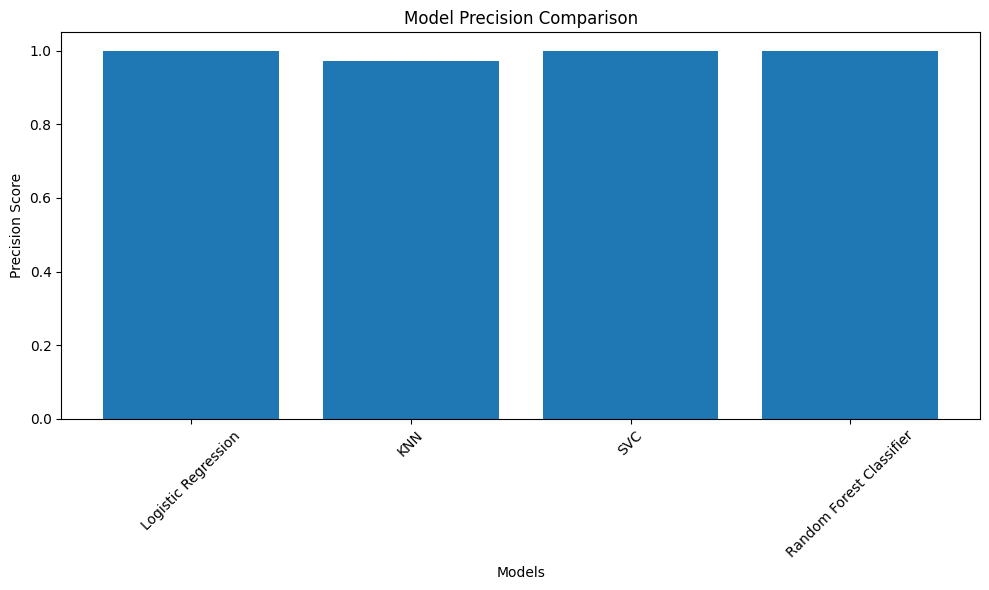

In [ ]:
import matplotlib.pyplot as plt
model_names = [item[0] for item in model_result]
precision_scores = [item[1] for item in model_result]


# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, precision_scores)
plt.xlabel("Models")
plt.ylabel("Precision Score")
plt.title("Model Precision Comparison")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


According to this Bar Chart the Logistic Regression Model is doing great in predicting the survival of a person on Titanic.